In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
#reading the data
df = pd.read_csv("train.csv", index_col=0)


In [3]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [5]:
#checking for null values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


Here we are able to see that **"Arrival Delay in Minutes"** has 310 null values and the column is **left skewed** with mean > median. Hence we are **imputing the column with the median value.**

In [7]:
df['Arrival Delay in Minutes'].fillna(0, inplace = True) 

In [8]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

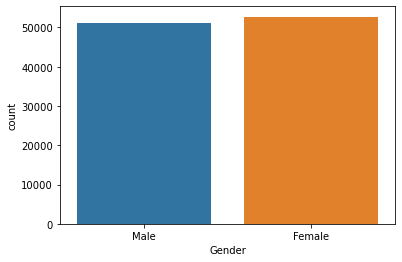

In [9]:
sns.countplot(data = df, x = "Gender")

We are able to see that we have almost the same number of Male and Female Customers.

<AxesSubplot:xlabel='Gender', ylabel='count'>

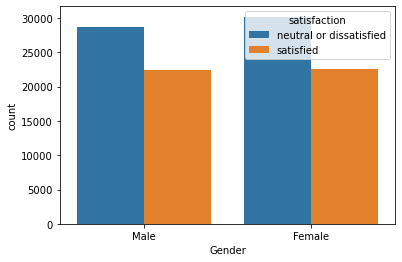

In [10]:
sns.countplot(data=df, x="Gender", hue="satisfaction")

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

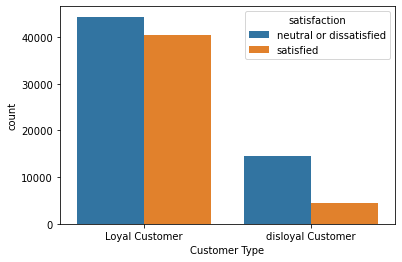

In [11]:
sns.countplot(data = df, x = "Customer Type", hue="satisfaction")

We are able to see that we have more number of loyal customers.But the ratio of Dissatified to satisfied customers is higher for disloyal customers

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

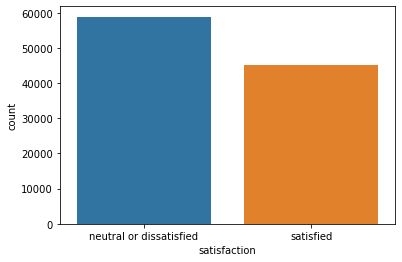

In [12]:
sns.countplot(data = df, x ="satisfaction")

<AxesSubplot:xlabel='Age', ylabel='satisfaction'>

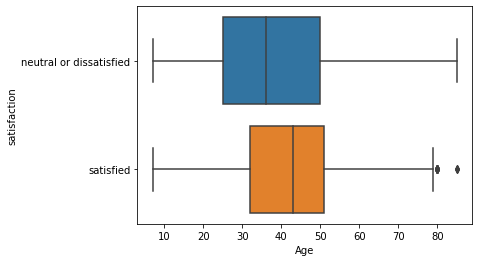

In [13]:
sns.boxplot(data = df, x = "Age", y = "satisfaction")

From the Age distribution we are able to see that **Younger** customers (less than 35) are more dissatified.

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

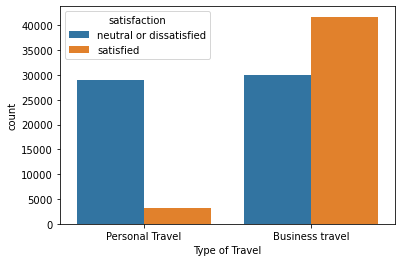

In [14]:
sns.countplot(data=df, x="Type of Travel", hue="satisfaction")

There is an extremely high number of dissatisfied customers compared to Satisifed Customer, out of customers travelling for Personal reason. And the ratio is flipped for Business Purposes.

<AxesSubplot:xlabel='Class', ylabel='count'>

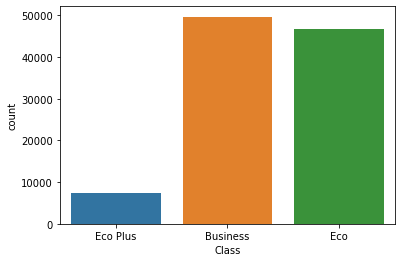

In [15]:
sns.countplot(data=df, x="Class")

<AxesSubplot:xlabel='Class', ylabel='count'>

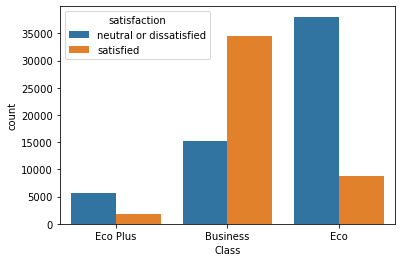

In [16]:
sns.countplot(data=df, x="Class", hue="satisfaction")

The business class has lesser number of Dissatisfied Customers compared to other classes

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

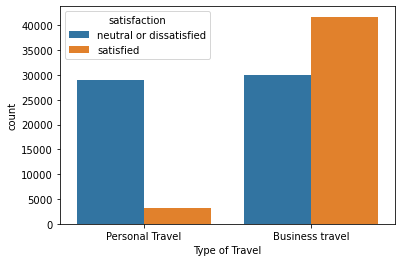

In [17]:
sns.countplot(data=df, x="Type of Travel", hue="satisfaction")

/Users/janita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

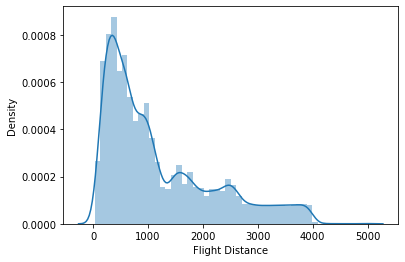

In [18]:
sns.distplot(df["Flight Distance"])

Most of these flights seems to be 0 - 1000 kms (lesser distance)

<AxesSubplot:xlabel='satisfaction', ylabel='Flight Distance'>

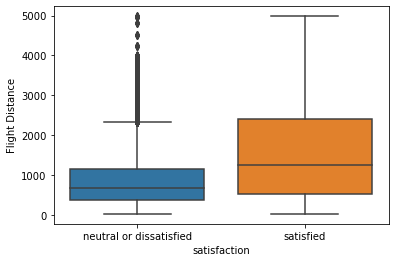

In [19]:
sns.boxplot(x="satisfaction",y="Flight Distance",data=df)

There seems to be more dissatisfaction for shorter distance flights (500-1000 kms). 50 percentile of dissatisfaction is covered.

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

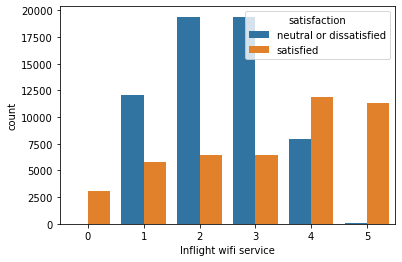

In [20]:
sns.countplot(data=df, x="Inflight wifi service", hue="satisfaction")

We are able to see more dissatisfied customers rating the inflight wifi service to be 2 or 3

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

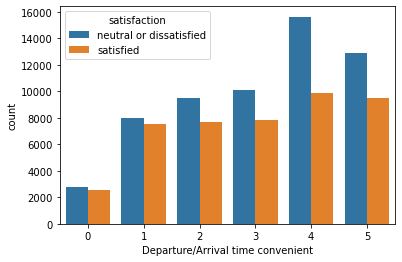

In [21]:
sns.countplot(data=df, x="Departure/Arrival time convenient", hue="satisfaction")

There is no clear difference between the ratings of Departure/Arrival time conveniences by the satisfied and dissatisfied customers

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

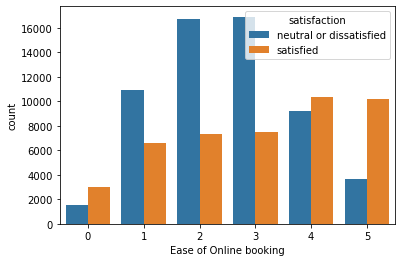

In [22]:
sns.countplot(data=df, x="Ease of Online booking", hue="satisfaction")

Most dissatified customers have rated lower values(1,2,3) for ease of online booking.

<AxesSubplot:xlabel='Gate location', ylabel='count'>

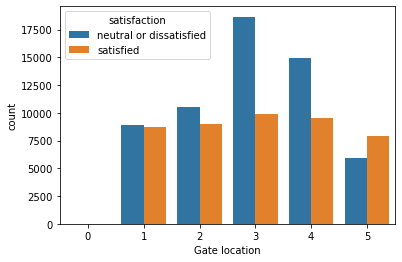

In [23]:
sns.countplot(data=df, x="Gate location", hue="satisfaction")

Most dissatified customers have rated average values(3,4) for Gate Location

<AxesSubplot:xlabel='Food and drink', ylabel='count'>

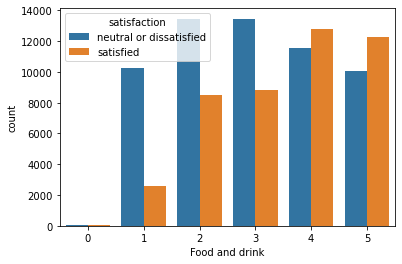

In [24]:
sns.countplot(data=df, x="Food and drink", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Food and Drink

<AxesSubplot:xlabel='Online boarding', ylabel='count'>

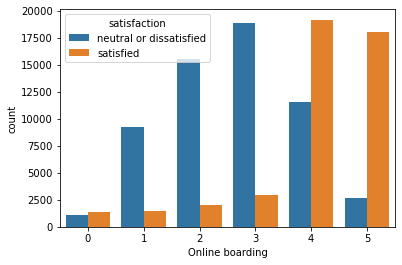

In [25]:
sns.countplot(data=df, x="Online boarding", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Online Boarding.
And the satisfied customers have actually rated well for Online Boarding.

<AxesSubplot:xlabel='Seat comfort', ylabel='count'>

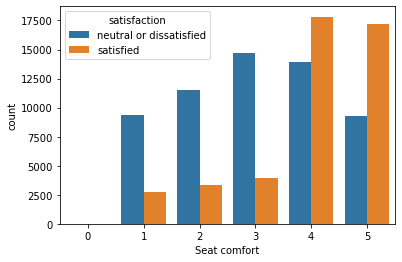

In [26]:
sns.countplot(data=df, x="Seat comfort", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Seat comfort.
And the satisfied customers have actually rated well for Seat comfort.

<AxesSubplot:xlabel='Inflight entertainment', ylabel='count'>

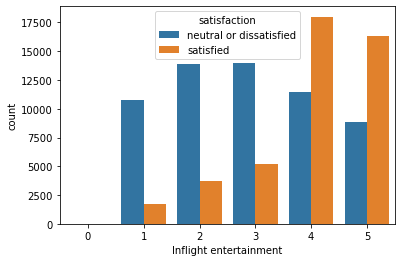

In [27]:
sns.countplot(data=df, x="Inflight entertainment", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Inflight entertainment.
And the satisfied customers have actually rated well for Inflight entertainment.

<AxesSubplot:xlabel='On-board service', ylabel='count'>

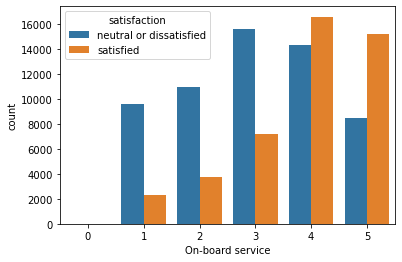

In [28]:
sns.countplot(data=df, x="On-board service", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for On-board service.
And the satisfied customers have actually rated well for On-board service.

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

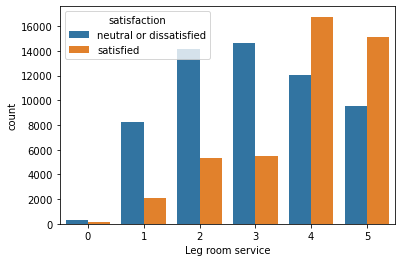

In [29]:
sns.countplot(data=df, x="Leg room service", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Leg room service .
And the satisfied customers have actually rated well for Leg room service .

<AxesSubplot:xlabel='Baggage handling', ylabel='count'>

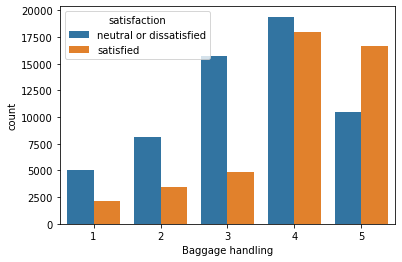

In [30]:
sns.countplot(data=df, x="Baggage handling", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Baggage handling  .
And the satisfied customers have actually rated well for Baggage handling  .

<AxesSubplot:xlabel='Checkin service', ylabel='count'>

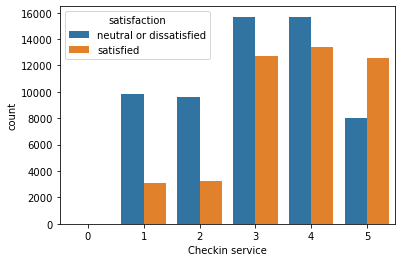

In [31]:
sns.countplot(data=df, x="Checkin service", hue="satisfaction")

Most dissatified customers have rated low values (less than 2) for Checkin service   .
And the satisfied customers have actually rated well for Checkin service  .

<AxesSubplot:xlabel='Inflight service', ylabel='count'>

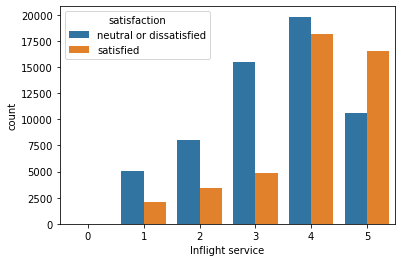

In [32]:
sns.countplot(data=df, x="Inflight service", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Inflight service .
And the satisfied customers have actually rated well for Inflight service.

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

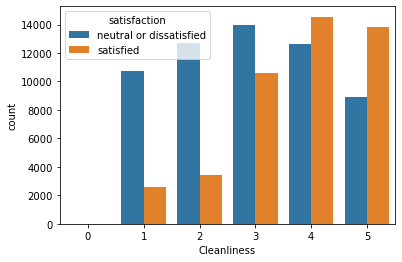

In [33]:
sns.countplot(data=df, x="Cleanliness", hue="satisfaction")

Most dissatified customers have rated low values (less than 3) for Cleanliness .
And the satisfied customers have actually rated well for Cleanliness.

/Users/janita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

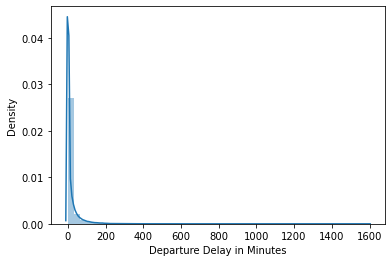

In [34]:
sns.distplot(df["Departure Delay in Minutes"])

Most of these flights seems to be having Departure Delay of less than 20 minutes

<AxesSubplot:xlabel='satisfaction', ylabel='Departure Delay in Minutes'>

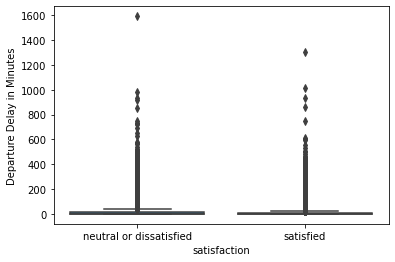

In [35]:
sns.boxplot(x="satisfaction",y="Departure Delay in Minutes",data=df)

There seems to be more dissatisfaction of customers when the flights that have more Departure Delay in Minutes

/Users/janita/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

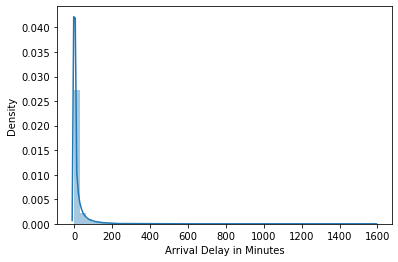

In [36]:
sns.distplot(df["Arrival Delay in Minutes"])

Most of these flights seems to be having Arrival Delay of less than 20 minutes

<AxesSubplot:xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

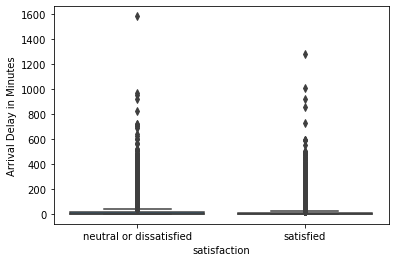

In [37]:
sns.boxplot(x="satisfaction",y="Arrival Delay in Minutes",data=df)

There seems to be more dissatisfaction of customers when the flights that have more Arrival Delay in Minutes

Most of the customers who rate low for one or more of Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service and Cleanliness tend to be dissatisfied.

Most of the customers who have faced longer Departure or Arrival Delay tend to be dissatisfied.

In [38]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Data Preparation

In [39]:
#Drop ID Column
df.drop(['id'], axis=1, inplace = True)

In [40]:
#Encoding the Columns - Gender, Type of Travel using One hot Encoder
df1 = df[['Gender','Type of Travel']]

onehot = OneHotEncoder(drop = 'first', # Drops the first category, so if there are m categories, we end up with m-1 new columns 
                       sparse = False  # Return a dense array (i.e. an ordinary array) instead of a sparse one
                      )

df1 = onehot.fit_transform(df1)
df1 = pd.DataFrame(df1, columns = onehot.get_feature_names_out())
df1


,Gender_Male,Type of Travel_Personal Travel
0,1.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
103899,0.0,0.0
103900,1.0,0.0
103901,1.0,0.0
103902,0.0,0.0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [42]:
#Encoding the ordinal columns Customer Type and Class
df2 = df[['Customer Type','Class']]

# Initialize the encoder, and pass a list of lists of orderings within each column
ordinal = OrdinalEncoder(categories = [
    ['disloyal Customer', 'Loyal Customer'],
    ['Eco','Eco Plus','Business']
])

ordinal.fit_transform(df2)

# Place the transformed data back into a DataFrame with the same column headers
df2 = pd.DataFrame(columns = df2.columns, data = ordinal.fit_transform(df2))
df2

,Customer Type,Class
0,1.0,1.0
1,0.0,2.0
2,1.0,2.0
3,1.0,2.0
4,1.0,2.0
...,...,...
103899,0.0,0.0
103900,1.0,2.0
103901,0.0,2.0
103902,0.0,0.0


In [43]:
X_numerical = df[df.columns[df.dtypes != 'object']]
X_numerical

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [44]:
X = pd.concat([X_numerical, df1, df2], axis = 1)

In [45]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type,Class
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,18.0,1.0,1.0,1.0,1.0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,6.0,1.0,0.0,0.0,2.0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0.0,0.0,0.0,1.0,2.0
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,9.0,0.0,0.0,1.0,2.0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,0.0,1.0,0.0,1.0,2.0


In [46]:
# Seperating the target column and converting it to True and False
y = df['satisfaction'] == 'satisfied'
y.head()

0    False
1    False
2     True
3    False
4     True
Name: satisfaction, dtype: bool

In [47]:
X_new = pd.concat([X,y], axis = 1)

In [48]:
X_new.corr().style.background_gradient(cmap='bwr_r', vmin = -1, vmax = 1)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type,Class,satisfaction
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.008928,-0.048524,0.281674,0.140565,0.137167
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.005828,-0.267344,0.225200,0.451211,0.298780
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.008974,-0.105085,0.007543,0.036279,0.284245
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,0.009142,0.259763,0.206869,-0.092788,-0.051601
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.006951,-0.133511,0.019509,0.106391,0.171705
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000333,-0.030700,-0.006078,0.004150,0.000682
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466,0.005772,-0.063439,0.059454,0.085908,0.209936
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874,-0.042260,-0.224803,0.189262,0.322924,0.503557
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029735,-0.026502,-0.124399,0.159484,0.227444,0.349459
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489,-0.030597,0.006117,-0.148199,0.109930,0.194366,0.398059


We are able to see that 'Ease of Online booking	' and 'Inflight wifi service' are highly correlated.
Simarly, 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are highly correlated.
But they do have correlation with the target variable, hence we did not remove them, since it does explain the target variable.

In [49]:
#Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022, stratify = y)

## Modelling

### Logistic Regression

In [50]:
#logistic regression for no penalty
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
log = LogisticRegression(penalty = 'none')
logs = make_pipeline(StandardScaler(), log)
cv_results = cross_validate(logs, X, y, scoring = ['accuracy','precision', 'recall', 'f1'], cv = cv)
data_no_pen = (pd.DataFrame(cv_results))
data_no_pen = pd.DataFrame(data_no_pen.mean()).transpose()
data_no_pen['penalty'] = 'none'
data_no_pen

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,penalty
0,0.152746,0.029982,0.874808,0.870103,0.835913,0.852654,none


In [51]:
#logistic regression for l2 penalty
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
log = LogisticRegression(penalty = 'l2',solver='liblinear')
logs = make_pipeline(StandardScaler(), log)
cv_results = cross_validate(logs, X, y, scoring = ['accuracy','precision', 'recall', 'f1'], cv = cv)
data_l2_pen = (pd.DataFrame(cv_results))
data_l2_pen = pd.DataFrame(data_l2_pen.mean()).transpose()
data_l2_pen['penalty'] = 'l2'
data_l2_pen

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,penalty
0,0.256556,0.028555,0.874779,0.87006,0.835891,0.852622,l2


In [52]:
#logistic regression for l1 penalty
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
log = LogisticRegression(penalty = 'l1', solver='liblinear')
logs = make_pipeline(StandardScaler(), log)
cv_results = cross_validate(logs, X, y, scoring = ['accuracy','precision', 'recall', 'f1'], cv = cv)
data_l1_pen = (pd.DataFrame(cv_results))
data_l1_pen = pd.DataFrame(data_l1_pen.mean()).transpose()
data_l1_pen['penalty'] = 'l1'
data_l1_pen

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,penalty
0,0.446587,0.028692,0.874788,0.870045,0.835936,0.852638,l1


In [53]:
data = data_no_pen.append(data_l2_pen)
data = data.append(data_l1_pen)

/var/folders/n3/lq2fc8w11vscg7mbswjnpyj00000gn/T/ipykernel_89013/1737604534.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_no_pen.append(data_l2_pen)
/var/folders/n3/lq2fc8w11vscg7mbswjnpyj00000gn/T/ipykernel_89013/1737604534.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data_l1_pen)


In [54]:
data

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,penalty
0,0.152746,0.029982,0.874808,0.870103,0.835913,0.852654,none
0,0.256556,0.028555,0.874779,0.870060,0.835891,0.852622,l2
0,0.446587,0.028692,0.874788,0.870045,0.835936,0.852638,l1


The accuracy, precision and recall are similar irrespective of penalty, hence we can are selecting the model with no penalty.

In [55]:
logit = make_pipeline(StandardScaler(), LogisticRegression(penalty = 'none'))

In [56]:
logit.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [57]:
logit_y_pred = logit.predict(X_test)

In [58]:
probs = logit.predict_proba(X_test)
probs

array([[0.02143483, 0.97856517],
       [0.88580191, 0.11419809],
       [0.96219869, 0.03780131],
       ...,
       [0.70021074, 0.29978926],
       [0.09014175, 0.90985825],
       [0.17801087, 0.82198913]])

In [59]:
# The 2nd column contains prob y = 1, which is the one we're interested in
logit_scores = probs[:,1]
logit_scores

array([0.97856517, 0.11419809, 0.03780131, ..., 0.29978926, 0.90985825,
       0.82198913])

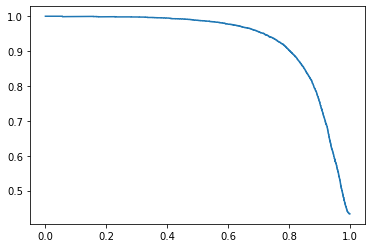

In [60]:
logit_prec, logit_rec, _ = precision_recall_curve(y_test, logit_scores, pos_label = True)

plt.plot(logit_rec, logit_prec)

In this case, logistic regression performs almost identically to linear SVC. The ROC curve is almost the same as well:

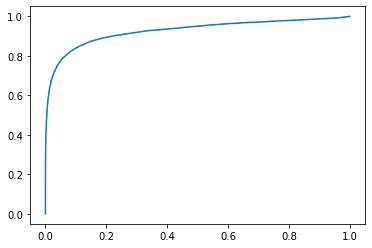

In [61]:
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit_scores, pos_label = True)
plt.plot(logit_fpr, logit_tpr)

In [62]:
roc_auc_score(y_test, logit_scores)

0.9258107547915781

In [63]:
conf_mat = confusion_matrix(y_test, logit_y_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.36090081, 0.0724368 ],
       [0.05334916, 0.51331323]])

In [64]:
print(classification_report(y_test, logit_y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.87      0.83      0.85     13508
       False       0.88      0.91      0.89     17664

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



In [65]:
import numpy as np

cost_benefit_matrix = np.array([[100, 70], [0, -30]])
cost_benefit_matrix

array([[100,  70],
       [  0, -30]])

In [66]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

25.76126010522264

### SVC

In [67]:
svc = make_pipeline(StandardScaler(), LinearSVC(C = 0.1, max_iter = 5000,random_state = 2022))  
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=0.1, max_iter=5000, random_state=2022))])

In [68]:
y_pred = svc.predict(X_test)
y_pred

array([ True, False, False, ..., False,  True,  True])

In [69]:
#printing the classification report
print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.87      0.83      0.85     13508
       False       0.87      0.91      0.89     17664

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



In [70]:
y_scores = svc.decision_function(X_test)
y_scores

array([ 1.20316248, -0.66738216, -1.00612192, ..., -0.27641807,
        0.74327275,  0.50807988])

In [71]:
svc_preds = pd.DataFrame({'actual' : y_test, 'decision function' : y_scores})
svc_preds

,actual,decision function
53363,True,1.203162
51456,False,-0.667382
46847,False,-1.006122
30940,True,0.291050
52375,True,0.166366
...,...,...
38994,False,-0.339329
94239,False,-1.375463
31737,False,-0.276418
7351,True,0.743273


<AxesSubplot:xlabel='decision function', ylabel='Density'>

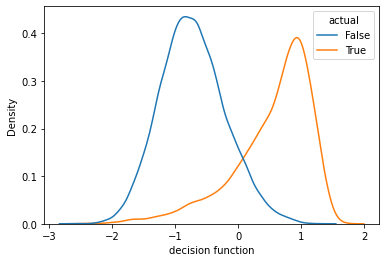

In [72]:
sns.kdeplot(svc_preds['decision function'], hue = svc_preds['actual'])

In [73]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_scores, pos_label = True)
prec, rec, thresholds

(array([0.43336542, 0.43334724, 0.43336114, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99925970e-01, 9.99925970e-01, ...,
        1.48060409e-04, 7.40302043e-05, 0.00000000e+00]),
 array([-2.54291785, -2.49975965, -2.44252488, ...,  1.69974086,
         1.70794736,  1.71303512]))

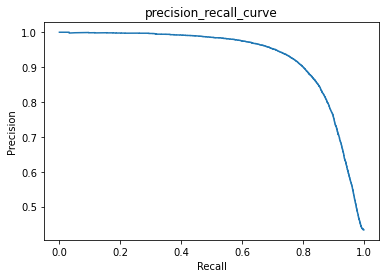

In [74]:
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("precision_recall_curve")
plt.show()

In [75]:
pr_df = pd.DataFrame(index = thresholds)

# We drop the last entry to make it the same length as thresholds
pr_df['precision'] = prec[:-1]
pr_df['recall'] = rec[:-1]
pr_df

,precision,recall
-2.542918,0.433365,1.000000
-2.499760,0.433347,0.999926
-2.442525,0.433361,0.999926
-2.401462,0.433343,0.999852
-2.394133,0.433325,0.999778
...,...,...
1.632905,1.000000,0.000370
1.682040,1.000000,0.000296
1.699741,1.000000,0.000222
1.707947,1.000000,0.000148


In [76]:
F1 = 2*(prec*rec)/(prec + rec)
pr_df['F1'] = F1[:-1]
pr_df

,precision,recall,F1
-2.542918,0.433365,1.000000,0.604682
-2.499760,0.433347,0.999926,0.604651
-2.442525,0.433361,0.999926,0.604665
-2.401462,0.433343,0.999852,0.604633
-2.394133,0.433325,0.999778,0.604602
...,...,...,...
1.632905,1.000000,0.000370,0.000740
1.682040,1.000000,0.000296,0.000592
1.699741,1.000000,0.000222,0.000444
1.707947,1.000000,0.000148,0.000296


<AxesSubplot:>

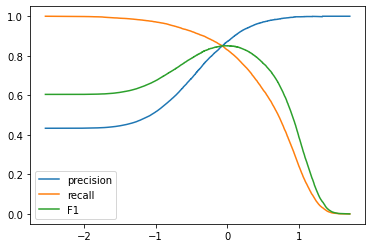

In [77]:
pr_df.plot()

In [78]:
y_pred_2 = y_scores > 0

print(classification_report(y_test, y_pred_2, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.87      0.83      0.85     13508
       False       0.87      0.91      0.89     17664

    accuracy                           0.87     31172
   macro avg       0.87      0.87      0.87     31172
weighted avg       0.87      0.87      0.87     31172



Observe that precision, recall and F1 for both the classes are same as before!

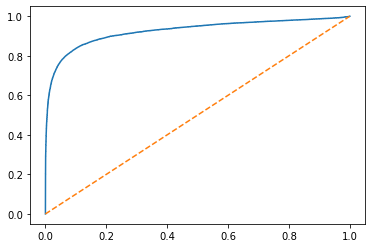

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label = True)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = 'dashed')

In [80]:
roc_auc_score(y_test, y_scores)

0.9253763637919344

In [81]:
conf_mat = confusion_matrix(y_test, y_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.35968177, 0.07365584],
       [0.05270756, 0.51395483]])

In [82]:
cost_benefit_matrix = np.array([[100, 70], [0, -30]])
cost_benefit_matrix

array([[100,  70],
       [  0, -30]])

In [83]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

25.705440780187345

### KNN

--------------------------------------------------------
Using Knn classifier Model
--------------------------------------------------------
--------------------------------------------------------
train test split with 30% test data
--------------------------------------------------------
--------------------------------------------------------
modelling with n_neighbors = 3
--------------------------------------------------------
--------------------------------------------------------
prediction with n_neighbors = 3
--------------------------------------------------------
with KNeighborsClassifier recall_score for k=3:  0.6751152073732719
--------------------------------------------------------
prediction with n_neighbors from 1 to 20 to find the best paramater for the model
--------------------------------------------------------
if k value is 1 and the value score is 0.6751152073732719
if k value is 2 and the value score is 0.5032704028541698
if k value is 3 and the value score is

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


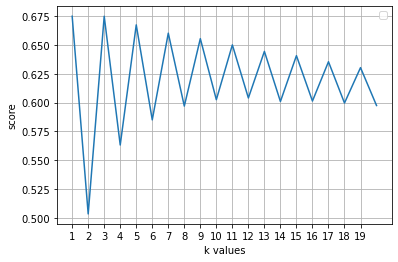

--------------------------------------------------------
based on the plot the best parameter for k is choosen to be 1
--------------------------------------------------------
--------------------------------------------------------
modelling with the best parameter for n_neighbors = 1
--------------------------------------------------------
--------------------------------------------------------
prediction with the best parameter for n_neighbors = 1
--------------------------------------------------------
with KNeighborsClassifier score for k= 1 : 0.6751152073732719
--------------------------------------------------------
Classification report
--------------------------------------------------------
              precision    recall  f1-score   support

        True       0.68      0.68      0.68     13454
       False       0.75      0.76      0.76     17718

    accuracy                           0.72     31172
   macro avg       0.72      0.72      0.72     31172
weighted avg     

In [176]:
print("--------------------------------------------------------")
print("Using Knn classifier Model")
print("--------------------------------------------------------")

# knn_imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# train_test_split
print("--------------------------------------------------------")
print("train test split with 30% test data")
print("--------------------------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# modelling 
print("--------------------------------------------------------")
print("modelling with n_neighbors = 3")
print("--------------------------------------------------------")
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,y_train)

# evaluation
print("--------------------------------------------------------")
print("prediction with n_neighbors = 3")
print("--------------------------------------------------------")
print("with KNeighborsClassifier recall_score for k=3: ",recall_score(y_test,knn1.predict(X_test)))

# finding best parameter
print("--------------------------------------------------------")
print("prediction with n_neighbors from 1 to 20 to find the best paramater for the model")
print("--------------------------------------------------------")

score_list = []

for k in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train,y_train)
    score_list.append(recall_score(y_test,knn2.predict(X_test)))
    print("if k value is",k,"and the value score is",recall_score(y_test,knn2.predict(X_test)))

# plot score vs parameters 
print("--------------------------------------------------------")
print("Plotting Score vs Paramaters used range")
print("--------------------------------------------------------")
plt.plot(range(1,21),score_list)
plt.xticks(range(1,20))
plt.xlabel("k values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

#choose bext parameter
max_value = max(score_list)
max_index = score_list.index(max_value)
kf = max_index+1
print("--------------------------------------------------------")
print("based on the plot the best parameter for k is choosen to be", kf)
print("--------------------------------------------------------")

# modelling with best parameter
print("--------------------------------------------------------")
print("modelling with the best parameter for n_neighbors =", kf)
print("--------------------------------------------------------")
knn3 = KNeighborsClassifier(n_neighbors=kf)
knn3.fit(X_train,y_train)

# evaluation with best parameter
print("--------------------------------------------------------")
print("prediction with the best parameter for n_neighbors =", kf)
print("--------------------------------------------------------")
print("with KNeighborsClassifier score for k=",kf,":" ,recall_score(y_test, knn3.predict(X_test)))

# Expected Value Frame Work 
print("--------------------------------------------------------")
print("Classification report")
print("--------------------------------------------------------")
print(classification_report(y_test, knn3.predict(X_test) , labels = [True, False]))


print("--------------------------------------------------------")
print("Confusion Matrix")
print("--------------------------------------------------------")
print(confusion_matrix(y_test,knn3.predict(X_test) , labels = [True, False], normalize = 'all'))
conf_mat_dummy = confusion_matrix(y_test,knn3.predict(X_test) , labels = [True, False], normalize = 'all')

print("--------------------------------------------------------")
print("cost_benefit_matrix")
print("--------------------------------------------------------")
cost_benefit_matrix = np.array([[100, 70], [0, -30]])
print(cost_benefit_matrix)

print("--------------------------------------------------------")
print("Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()")
print("--------------------------------------------------------")
print((conf_mat_dummy * cost_benefit_matrix).sum())

### Random Forest

--------------------------------------------------------
Using Random forest Model
--------------------------------------------------------
--------------------------------------------------------
train test split with 30% test data
--------------------------------------------------------
--------------------------------------------------------
modelling with n_estimators = 200
--------------------------------------------------------
--------------------------------------------------------
prediction with n_estimators = 200
--------------------------------------------------------
Random Forest score with n__estimators = 200:  0.9407611119369704
--------------------------------------------------------
prediction with n_estimators from 100 to 400 with interval of 100, to find the best paramater for the model
--------------------------------------------------------
if Random Forest n_estimators values is 100 value of recall_score 0.9403894752489966
if Random Forest n_estimators values is 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


if Random Forest n_estimators values is 400 value of recall_score 0.9417273673257024
--------------------------------------------------------
Plotting Score vs Paramaters used range
--------------------------------------------------------


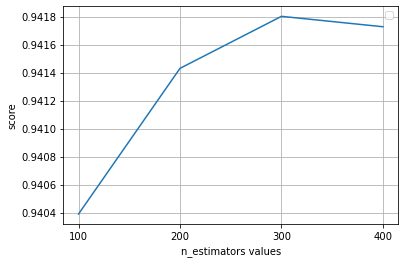

--------------------------------------------------------
based on the plot the best parameter for n_estimators is choosen to be 300
--------------------------------------------------------
--------------------------------------------------------
modelling with the best parameter for n_estimators = 300
--------------------------------------------------------
--------------------------------------------------------
prediction with the best parameter for n_estimators = 300
--------------------------------------------------------
with Random Forest Model score for n_estimators= 300 : 0.9420990040136762
--------------------------------------------------------
Classification report
--------------------------------------------------------
              precision    recall  f1-score   support

        True       0.97      0.94      0.96     13454
       False       0.96      0.98      0.97     17718

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0

In [179]:
print("--------------------------------------------------------")
print("Using Random forest Model")
print("--------------------------------------------------------")

# rf_imports
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# train_test_split
print("--------------------------------------------------------")
print("train test split with 30% test data")
print("--------------------------------------------------------")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# modelling 
print("--------------------------------------------------------")
print("modelling with n_estimators = 200")
print("--------------------------------------------------------")
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

# evaluation
print("--------------------------------------------------------")
print("prediction with n_estimators = 200")
print("--------------------------------------------------------")
print("Random Forest score with n__estimators = 200: ",recall_score(y_test, rf.predict(X_test)))

# finding best parameter
print("--------------------------------------------------------")
print("prediction with n_estimators from 100 to 400 with interval of 100, to find the best paramater for the model")
print("--------------------------------------------------------")
score_list = []
x_list = []

for x in range(100,500,100):
    rf2 = RandomForestClassifier(n_estimators=x)
    rf2.fit(X_train,y_train)
    score_list.append(recall_score(y_test, rf2.predict(X_test)))
    x_list.append(x)
    print("if Random Forest n_estimators values is",x,"value of recall_score",recall_score(y_test, rf2.predict(X_test)))

# plot score vs parameters 
print("--------------------------------------------------------")
print("Plotting Score vs Paramaters used range")
print("--------------------------------------------------------")
plt.plot(x_list,score_list)
plt.xticks(x_list)
plt.xlabel("n_estimators values")
plt.ylabel("score")
plt.legend()
plt.grid()
plt.show()

#choose best parameter
max_value = max(score_list)
max_index = score_list.index(max_value)
kf = x_list[max_index]
print("--------------------------------------------------------")
print("based on the plot the best parameter for n_estimators is choosen to be", kf)
print("--------------------------------------------------------")

# modelling with best parameter
print("--------------------------------------------------------")
print("modelling with the best parameter for n_estimators =", kf)
print("--------------------------------------------------------")
rf3 = RandomForestClassifier(n_estimators=kf)
rf3.fit(X_train,y_train)

# evaluation with best parameter
print("--------------------------------------------------------")
print("prediction with the best parameter for n_estimators =", kf)
print("--------------------------------------------------------")
print("with Random Forest Model score for n_estimators=",kf,":" ,recall_score(y_test, rf3.predict(X_test)))

# Expected Value Frame Work 
print("--------------------------------------------------------")
print("Classification report")
print("--------------------------------------------------------")
print(classification_report(y_test, rf3.predict(X_test) , labels = [True, False]))


print("--------------------------------------------------------")
print("Confusion Matrix")
print("--------------------------------------------------------")
print(confusion_matrix(y_test,rf3.predict(X_test) , labels = [True, False], normalize = 'all'))
conf_mat_dummy = confusion_matrix(y_test,rf3.predict(X_test) , labels = [True, False], normalize = 'all')

print("--------------------------------------------------------")
print("cost_benefit_matrix")
print("--------------------------------------------------------")
cost_benefit_matrix = np.array([[100, 70], [0, -30]])
print(cost_benefit_matrix)

print("--------------------------------------------------------")
print("Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()")
print("----------------------------------------------------")
print((conf_mat_dummy * cost_benefit_matrix).sum())

### Decision Tree

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2022)
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

<AxesSubplot:xlabel='Max Leaf Nodes', ylabel='Score'>

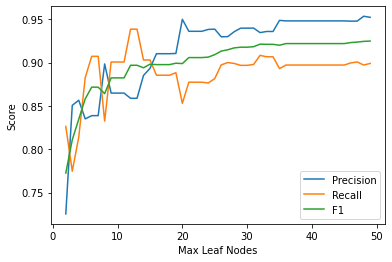

In [181]:
#Finding the optimum value of max_leaf_nodes
from sklearn.metrics import precision_score, recall_score, f1_score

leaves = range(2,50)

score_df = pd.DataFrame(index = leaves, columns = ['Precision', 'Recall', 'F1'])

for i in score_df.index:
    tree = DecisionTreeClassifier(max_leaf_nodes = i)
    tree.fit(scaler.transform(X_train), y_train)
    y_pred = tree.predict(scaler.transform(X_test))
    
    score_df['Precision'][i] = precision_score(y_test, y_pred, pos_label = True)
    score_df['Recall'][i] = recall_score(y_test, y_pred, pos_label = True)
    score_df['F1'][i] = f1_score(y_test, y_pred, pos_label = True)
    
score_df.plot(xlabel = 'Max Leaf Nodes', ylabel = 'Score')

<b>From the above plot and below table taking Max Leaf Nodes as 20 is will give the highest recall value with certail trade off with recall value</b>

In [182]:
score_df

,Precision,Recall,F1
2,0.725439,0.82628,0.772583
3,0.85062,0.774725,0.810901
4,0.856521,0.813945,0.83469
5,0.83501,0.882561,0.858128
6,0.838763,0.907157,0.87162
7,0.838763,0.907157,0.87162
8,0.898366,0.83241,0.864131
9,0.864752,0.900583,0.882304
10,0.864752,0.900583,0.882304
11,0.864752,0.900583,0.882304


<AxesSubplot:xlabel='Max Depth', ylabel='Score'>

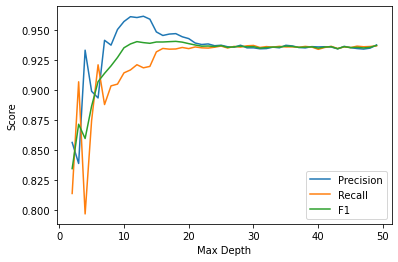

In [183]:

leaves = range(2,50)

score_df = pd.DataFrame(index = leaves, columns = ['Precision', 'Recall', 'F1'])

for i in score_df.index:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(scaler.transform(X_train), y_train)
    y_pred = tree.predict(scaler.transform(X_test))
    
    score_df['Precision'][i] = precision_score(y_test, y_pred, pos_label = True)
    score_df['Recall'][i] = recall_score(y_test, y_pred, pos_label = True)
    score_df['F1'][i] = f1_score(y_test, y_pred, pos_label = True)
    
score_df.plot(xlabel = 'Max Depth', ylabel = 'Score')

<b>From the above plot and below table taking Max depth as 12 is will give the highest recall value with certail trade off with recall value</b>

In [184]:
score_df

,Precision,Recall,F1
2,0.856521,0.813945,0.83469
3,0.838992,0.907157,0.871744
4,0.933547,0.796883,0.859818
5,0.899241,0.874732,0.886817
6,0.893681,0.921338,0.907299
7,0.941808,0.888175,0.914205
8,0.937768,0.90376,0.92045
9,0.950815,0.905237,0.927466
10,0.957473,0.914617,0.935555
11,0.961512,0.917054,0.938757


<b> Finding the precison score with optimal max depth and max leaf modes in decesion tree</b>

In [185]:
tree = DecisionTreeClassifier(max_depth = 8,max_leaf_nodes=9)
tree.fit(scaler.transform(X_train), y_train)
y_pred = tree.predict(scaler.transform(X_test))

print("precision_score",precision_score(y_test, y_pred, pos_label = True))
print("recall_score",recall_score(y_test, y_pred, pos_label = True))
print("f1_score",f1_score(y_test, y_pred, pos_label = True))

precision_score 0.8647517730496453
recall_score 0.9005834995199055
f1_score 0.8823039907377256


In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.86      0.90      0.88     13539
       False       0.92      0.89      0.91     17633

    accuracy                           0.90     31172
   macro avg       0.89      0.90      0.89     31172
weighted avg       0.90      0.90      0.90     31172



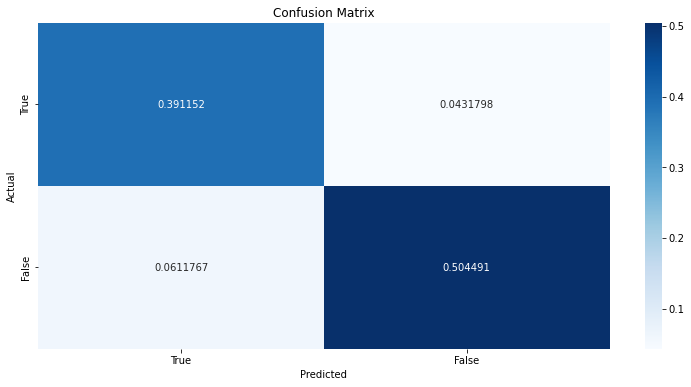

In [187]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred, labels=[True,False], normalize = 'all')
plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=[True,False], yticklabels=[True,False], cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

In [188]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

treepipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth = 12,max_leaf_nodes=20))

cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022) #Use the same random state for recall also
cv_results = cross_validate(treepipe, X, y, scoring = ['precision', 'recall', 'f1'], cv = cv)
cv_results

{'fit_time': array([0.34231305, 0.27061105, 0.29091597, 0.27842879, 0.27616477]),
 'score_time': array([0.04405928, 0.03031182, 0.02992392, 0.02996802, 0.03039622]),
 'test_precision': array([0.95369102, 0.94790123, 0.95425321, 0.91023177, 0.91243872]),
 'test_recall': array([0.85074958, 0.85263742, 0.8570794 , 0.89405886, 0.88872848]),
 'test_f1': array([0.89928395, 0.8977492 , 0.90305973, 0.90207283, 0.90042754])}

In [189]:
pd.DataFrame(cv_results)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.342313,0.044059,0.953691,0.850750,0.899284
1,0.270611,0.030312,0.947901,0.852637,0.897749
2,0.290916,0.029924,0.954253,0.857079,0.903060
3,0.278429,0.029968,0.910232,0.894059,0.902073
4,0.276165,0.030396,0.912439,0.888728,0.900428


In [190]:
pd.DataFrame(cv_results).mean()

fit_time          0.291687
score_time        0.032932
test_precision    0.935703
test_recall       0.868651
test_f1           0.900519
dtype: float64

In [191]:

cost_benefit_matrix = np.array([[100, 70], [0, -30]])
print(cost_benefit_matrix)

print("--------------------------------------------------------")
print("Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()")
print("--------------------------------------------------------")
print((matrix * cost_benefit_matrix).sum())

[[100  70]
 [  0 -30]]
--------------------------------------------------------
Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()
--------------------------------------------------------
27.00307968689849


### Gradient Boosting

In [196]:
sample_weight = y.copy()

for value in y.value_counts().index:
    sample_weight[y == value] = 1/y.value_counts()[value]
    
sample_weight = sample_weight/sample_weight.sum()

sample_weight

0         0.000008
1         0.000008
2         0.000011
3         0.000008
4         0.000011
            ...   
103899    0.000008
103900    0.000011
103901    0.000008
103902    0.000008
103903    0.000008
Name: satisfaction, Length: 103904, dtype: object

In [197]:
#%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5, 7],  
    'learning_rate' : [0.01, 0.1, 1],
    'n_estimators' : [50, 100, 500]
} 

grid = GridSearchCV(GradientBoostingClassifier(),      
                    param_grid, 
                    scoring = 'recall',
                    cv = cv,
                   )

grid.fit(X,y, sample_weight  = sample_weight) # <-- pass the sample weights here

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 500]},
             scoring='recall')

In [198]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,7.044632,0.056824,0.025729,0.001021,1,5,50,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.947029,0.949028,0.945919,0.947696,0.952915,0.948517,0.002418,1
20,70.267756,0.657995,0.182461,0.009995,0.1,5,500,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.947807,0.949139,0.944475,0.948806,0.951138,0.948273,0.002186,2
29,43.287399,0.247931,0.125492,0.012624,1,3,500,"{'learning_rate': 1, 'max_depth': 3, 'n_estima...",0.944586,0.950583,0.943698,0.949139,0.950250,0.947651,0.002918,3
23,98.981434,1.858093,0.318174,0.029493,0.1,7,500,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.946585,0.947252,0.944697,0.947474,0.951360,0.947474,0.002175,4
31,14.092318,0.078659,0.046582,0.004478,1,5,100,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.945475,0.946474,0.946252,0.946252,0.950472,0.946985,0.001776,5
28,8.631252,0.030106,0.032545,0.004414,1,3,100,"{'learning_rate': 1, 'max_depth': 3, 'n_estima...",0.945142,0.950028,0.941921,0.947474,0.947696,0.946452,0.002743,6
22,19.242879,0.111703,0.071397,0.013528,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.944919,0.947807,0.941810,0.946141,0.951471,0.946430,0.003194,7
33,9.749282,0.020220,0.034019,0.000982,1,7,50,"{'learning_rate': 1, 'max_depth': 7, 'n_estima...",0.940366,0.946363,0.942810,0.948695,0.950805,0.945808,0.003800,8
32,70.127450,0.218700,0.183895,0.026412,1,5,500,"{'learning_rate': 1, 'max_depth': 5, 'n_estima...",0.942254,0.946141,0.941588,0.945697,0.949917,0.945119,0.003002,9
34,19.921263,0.490215,0.067930,0.012174,1,7,100,"{'learning_rate': 1, 'max_depth': 7, 'n_estima...",0.942921,0.945364,0.942587,0.946141,0.946252,0.944653,0.001584,10


In [201]:
grid.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [200]:
boost = GradientBoostingClassifier(
    n_estimators = 50,   
    learning_rate = 1,  
    max_depth = 5,        
    random_state= 2022
)    

cv_results = cross_validate(boost, X, y, 
                            scoring = ['precision', 'recall', 'f1'], 
                            cv = cv, 
                            fit_params = {'sample_weight' : sample_weight},
                            return_estimator = True,
                           )

cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,estimator,test_precision,test_recall,test_f1
0,7.266834,0.043595,([DecisionTreeRegressor(criterion='friedman_ms...,0.951462,0.946918,0.949185
1,8.112686,0.040772,([DecisionTreeRegressor(criterion='friedman_ms...,0.949761,0.948917,0.949339
2,7.165827,0.035331,([DecisionTreeRegressor(criterion='friedman_ms...,0.956649,0.945919,0.951254
3,7.284539,0.052880,([DecisionTreeRegressor(criterion='friedman_ms...,0.949688,0.947474,0.948580
4,7.364929,0.056460,([DecisionTreeRegressor(criterion='friedman_ms...,0.948811,0.953026,0.950914


In [202]:
pd.DataFrame(cv_results).mean()

/var/folders/n3/lq2fc8w11vscg7mbswjnpyj00000gn/T/ipykernel_89013/554093219.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(cv_results).mean()


fit_time          7.438963
score_time        0.045808
test_precision    0.951274
test_recall       0.948451
test_f1           0.949854
dtype: float64

In [203]:
importances = pd.DataFrame(index = X.columns)

for i in cv_results.index:
    model = cv_results['estimator'][i]
    importances[i] = model.feature_importances_
    
importances['mean'] = importances.mean(axis = 1)
importances.sort_values(by = 'mean', ascending = False)

,0,1,2,3,4,mean
Online boarding,0.413703,0.413714,0.412998,0.423888,0.420372,0.416935
Inflight wifi service,0.231261,0.239332,0.237853,0.235246,0.239250,0.236588
Type of Travel_Personal Travel,0.140093,0.142010,0.144308,0.140178,0.144228,0.142163
Inflight entertainment,0.057106,0.058339,0.057167,0.056303,0.057818,0.057347
Class,0.042620,0.041184,0.041396,0.043011,0.042212,0.042085
Checkin service,0.025666,0.020528,0.020281,0.019926,0.019014,0.021083
Customer Type,0.019322,0.018824,0.019702,0.019604,0.018376,0.019166
Leg room service,0.011273,0.011225,0.011734,0.011698,0.011793,0.011545
Cleanliness,0.007945,0.008000,0.006774,0.005382,0.006244,0.006869
Age,0.007151,0.007497,0.007615,0.006120,0.005528,0.006782


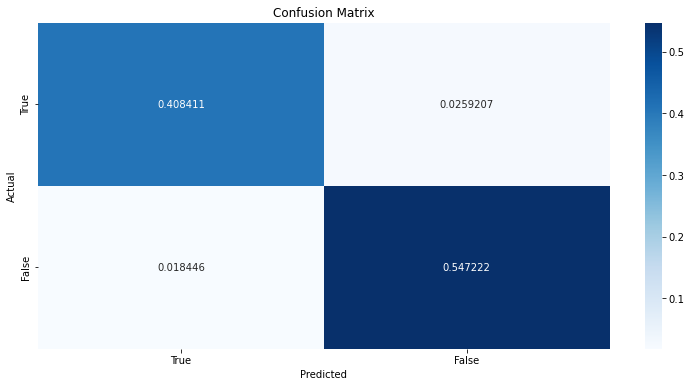

In [204]:
from sklearn.metrics import confusion_matrix

boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
matrix = confusion_matrix(y_test, y_pred, labels=[True,False], normalize = 'all')
plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=[True,False], yticklabels=[True,False], cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()

In [205]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.96      0.94      0.95     13539
       False       0.95      0.97      0.96     17633

    accuracy                           0.96     31172
   macro avg       0.96      0.95      0.95     31172
weighted avg       0.96      0.96      0.96     31172



In [206]:

cost_benefit_matrix = np.array([[100, 70], [0, -30]])
print(cost_benefit_matrix)

print("--------------------------------------------------------")
print("Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()")
print("--------------------------------------------------------")
print((matrix * cost_benefit_matrix).sum())

[[100  70]
 [  0 -30]]
--------------------------------------------------------
Expect Value Framework = (conf_mat_dummy * cost_benefit_matrix).sum()
--------------------------------------------------------
26.238932375208517


## Deployment

### Evaluation

In [84]:
eval_df = pd.read_csv("test.csv", index_col = 0)

In [85]:
eval_df.drop(['id'],axis = 1, inplace = True)

In [86]:
eval_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [87]:
#Encoding the Columns - Gender, Type of Travel
eval_df1 = eval_df[['Gender','Type of Travel']]

onehot = OneHotEncoder(drop = 'first', # Drops the first category, so if there are m categories, we end up with m-1 new columns 
                       sparse = False  # Return a dense array (i.e. an ordinary array) instead of a sparse one
                      )

eval_df1 = onehot.fit_transform(eval_df1)
eval_df1 = pd.DataFrame(eval_df1, columns = onehot.get_feature_names_out())
eval_df1


,Gender_Male,Type of Travel_Personal Travel
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
25971,1.0,0.0
25972,1.0,0.0
25973,0.0,1.0
25974,1.0,0.0


In [88]:
#Encoding the ordinal columns Customer Type and Class
eval_df2 = eval_df[['Customer Type','Class']]

# Initialize the encoder, and pass a list of lists of orderings within each column
ordinal = OrdinalEncoder(categories = [
    ['disloyal Customer', 'Loyal Customer'],
    ['Eco','Eco Plus','Business']
])

ordinal.fit_transform(eval_df2)

# Place the transformed data back into a DataFrame with the same column headers
eval_df2 = pd.DataFrame(columns = eval_df2.columns, data = ordinal.fit_transform(eval_df2))
eval_df2

,Customer Type,Class
0,1.0,0.0
1,1.0,2.0
2,0.0,0.0
3,1.0,2.0
4,1.0,0.0
...,...,...
25971,0.0,2.0
25972,1.0,2.0
25973,1.0,0.0
25974,1.0,2.0


In [89]:
eval_X_numerical = eval_df[eval_df.columns[eval_df.dtypes != 'object']]
eval_X_numerical

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,52,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0
1,36,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0
2,20,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0
3,44,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0
4,49,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0


In [90]:
eval_X = pd.concat([eval_X_numerical, eval_df1, eval_df2], axis = 1)

In [91]:
eval_X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type,Class
0,52,160,5,4,3,4,3,4,3,5,...,5,2,5,5,50,44.0,0.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,4,3,4,5,0,0.0,0.0,0.0,1.0,2.0
2,20,192,2,0,2,4,2,2,2,2,...,3,2,2,2,0,0.0,1.0,0.0,0.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,...,1,3,1,4,0,6.0,1.0,0.0,1.0,2.0
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,2,4,0,20.0,0.0,0.0,1.0,0.0


In [96]:
eval_X.isnull().sum()

Age                                   0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
Gender_Male                           0
Type of Travel_Personal Travel        0
Customer Type                         0
Class                                 0
dtype: int64

In [97]:
eval_X['Arrival Delay in Minutes'].fillna(0, inplace = True) 

In [92]:
# Seperating the target column and converting it to True and False
eval_y = eval_df['satisfaction'] == 'satisfied'
eval_y.head()

0     True
1     True
2    False
3     True
4     True
Name: satisfaction, dtype: bool

In [108]:

cost_benefit_matrix = np.array([[100, 70], [0, -30]])
cost_benefit_matrix

array([[100,  70],
       [  0, -30]])

### logistic regression eval

In [98]:
y_eval_pred = logit.predict(eval_X)

In [99]:
y_eval_pred

array([ True,  True, False, ..., False,  True, False])

In [100]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.36603018, 0.07295196],
       [0.0552818 , 0.50573606]])

In [101]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.87      0.83      0.85     11403
       False       0.87      0.90      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [102]:

cost_benefit_matrix = np.array([[100, 70], [0, -30]])
cost_benefit_matrix

array([[100,  70],
       [  0, -30]])

In [103]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

26.53757314444102

### SVC eval

In [104]:
y_eval_pred = svc.predict(eval_X)

In [105]:
y_eval_pred

array([ True,  True, False, ..., False,  True, False])

In [106]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.36475978, 0.07422236],
       [0.05451186, 0.50650601]])

In [107]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.87      0.83      0.85     11403
       False       0.87      0.90      0.89     14573

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [109]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

26.476362796427473

### KNN Eval

In [222]:
y_eval_pred = knn3.predict(eval_X)

In [223]:
y_eval_pred

array([False,  True, False, ..., False, False, False])

In [224]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.29384817, 0.14513397],
       [0.13300739, 0.42801047]])

In [225]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.69      0.67      0.68     11403
       False       0.75      0.76      0.75     14573

    accuracy                           0.72     25976
   macro avg       0.72      0.72      0.72     25976
weighted avg       0.72      0.72      0.72     25976



In [226]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

26.703880505081614

### Decision Tree Eval

In [217]:
y_eval_pred = tree.predict(eval_X)

/Users/janita/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [218]:
y_eval_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [219]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.42377579, 0.01520634],
       [0.5065445 , 0.05447336]])

In [220]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.46      0.97      0.62     11403
       False       0.78      0.10      0.17     14573

    accuracy                           0.48     25976
   macro avg       0.62      0.53      0.40     25976
weighted avg       0.64      0.48      0.37     25976



In [221]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

41.80782260548198

### Random Forest Eval

In [212]:
y_eval_pred = rf3.predict(eval_X)

In [213]:
y_eval_pred

array([ True,  True, False, ..., False,  True, False])

In [214]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.41361257, 0.02536957],
       [0.01170311, 0.54931475]])

In [215]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.97      0.94      0.96     11403
       False       0.96      0.98      0.97     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [216]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

26.65768401601478

### Gradient Boost Eval

In [207]:
y_eval_pred = boost.predict(eval_X)

In [208]:
y_eval_pred

array([ True,  True, False, ..., False,  True, False])

In [209]:
conf_mat = confusion_matrix(eval_y, y_eval_pred, labels = [True, False], normalize = 'all')
conf_mat

array([[0.41522944, 0.02375269],
       [0.01947952, 0.54153834]])

In [210]:
print(classification_report(eval_y, y_eval_pred, labels = [True, False]))

              precision    recall  f1-score   support

        True       0.96      0.95      0.95     11403
       False       0.96      0.97      0.96     14573

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [211]:
#Compute the expected value if we adopt this marketing strategy.
expected_value = (conf_mat * cost_benefit_matrix).sum()
expected_value

26.939482599322453